In [2]:
#All data for this research can be downloaded from the following link: https://gwosc.org/eventapi/html/query/show?release=GWTC-1-confident,GWTC-2.1-confident,GWTC-3-confident
#Rename your data file download.csv THIS IS IMPORTANT
#The data file is also included so you can use that or just use the link provided above
#All the library's you need to run this
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import files
import scipy

In [4]:
if not os.path.exists("download.csv"):
    try:
        from google.colab import files
        files.upload()
    except ImportError:
        raise FileNotFoundError(
            "download.csv not found. Place it in the same directory as the notebook."
        )

csvFile = pd.read_csv(
    "download.csv",
    usecols=[
        "mass_1_source",
        "mass_2_source",
        "network_matched_filter_snr",
        "luminosity_distance",
        "total_mass_source"
    ]
)

Saving download.csv to download.csv


In [ ]:
cleanedCSVFILE = csvFile.dropna()
cleanedCSVFILE.head()

,mass_1_source,mass_2_source,network_matched_filter_snr,luminosity_distance,total_mass_source
11,85.0,20.0,7.6,8280.0,106.6
12,24.8,18.5,14.6,1540.0,43.4
13,27.7,9.0,19.8,720.0,36.8
14,33.7,24.2,9.0,3320.0,58.0
15,51.3,30.4,10.6,3800.0,81.3


In [ ]:
#These lines take the filtered CSV data and find the mass by distance ratio using the columns total_mass_source and luminosity_distance
#Then the new column is appended to the cleanedCSVFILE
cleanedCSVFILE = csvFile.dropna().copy()

cleanedCSVFILE['mass_by_distance'] = (
    cleanedCSVFILE['total_mass_source'] /
    cleanedCSVFILE['luminosity_distance']
)

/tmp/ipython-input-1819105330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedCSVFILE['mass_by_distance'] = mass_by_distance


,mass_1_source,mass_2_source,network_matched_filter_snr,luminosity_distance,total_mass_source,mass_by_distance
11,85.0,20.0,7.6,8280.0,106.6,0.012874
12,24.8,18.5,14.6,1540.0,43.4,0.028182
13,27.7,9.0,19.8,720.0,36.8,0.051111
14,33.7,24.2,9.0,3320.0,58.0,0.017470
15,51.3,30.4,10.6,3800.0,81.3,0.021395


Text(0.1, 0.8, 'r = 0.79')

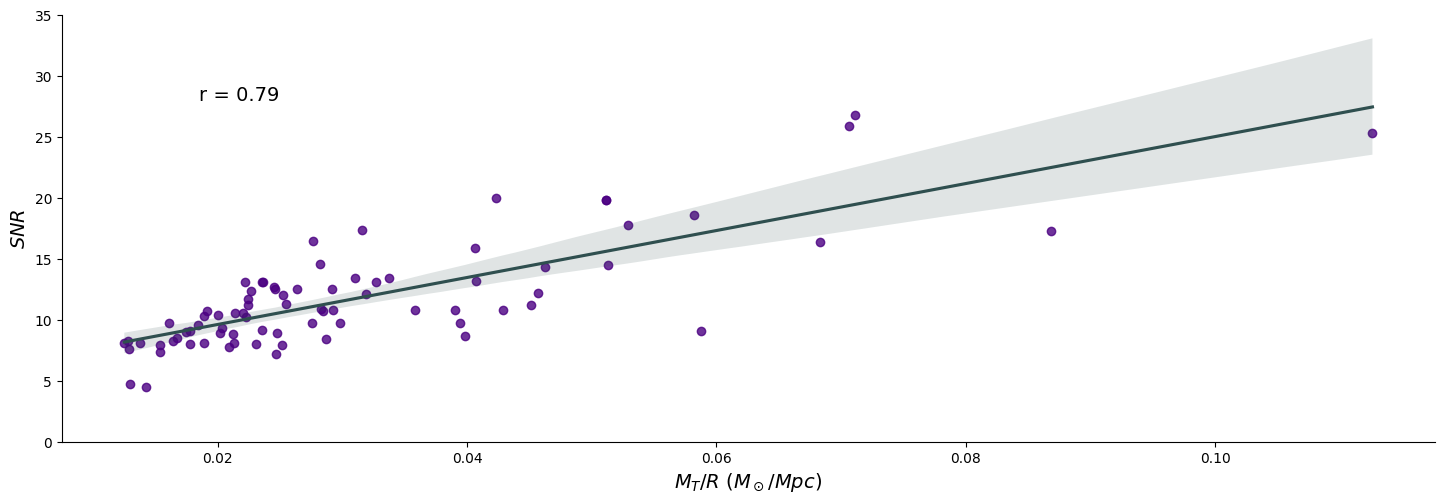

In [ ]:
#This is the graph of the mass_by_distance to the SNR (our main result)
#Strong correlation (r = 0.79, p < 0.01) is observed between SNR and MT/R.
xx = cleanedCSVFILE['mass_by_distance'].to_list()
yy = cleanedCSVFILE['network_matched_filter_snr'].to_list()
corr, _ = scipy.stats.pearsonr(xx, yy)
sb.lmplot(y="network_matched_filter_snr", x="mass_by_distance", aspect = 2.9, data=cleanedCSVFILE, scatter_kws={'color':'indigo'}, line_kws={'color':'darkslategrey'});
plt.xlabel(r"$M_{T}/R\ (M_\odot/Mpc$)", color = 'black', fontsize='14', horizontalalignment='center')
plt.ylabel('$SNR$', fontsize='14')
plt.ylim(0, 35)
plt.text(0.1, 0.8, f'r = {corr:.2f}', fontsize=14, transform=plt.gca().transAxes)

5.868154192219262e-06

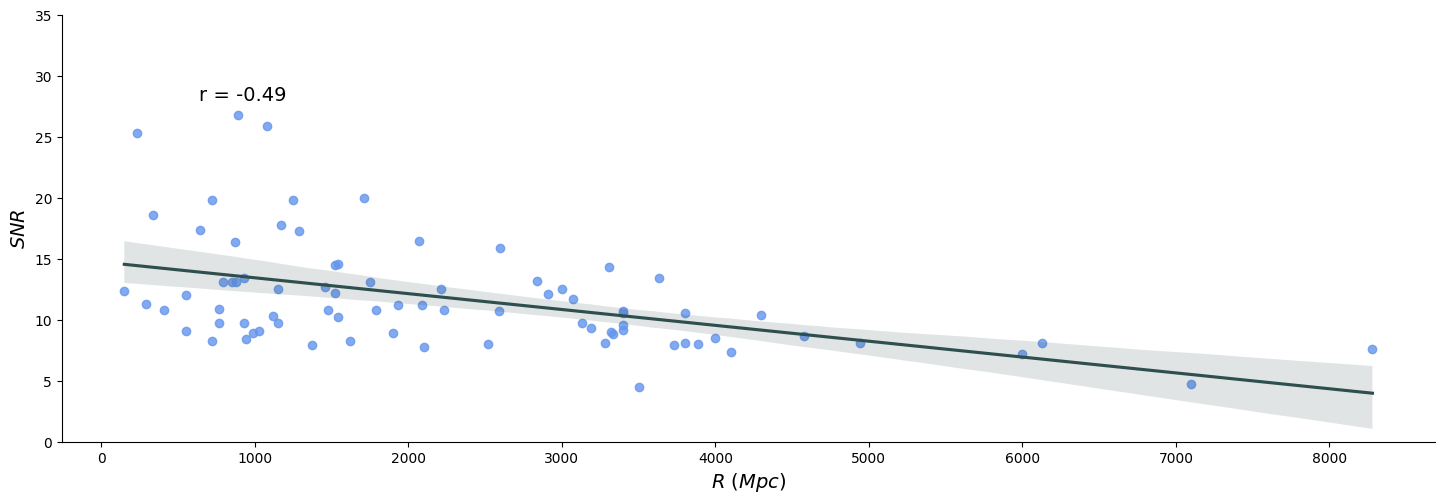

In [ ]:
#this is the distance away from Earth to the SNR
#There is a strong negative correlation (r = -0.49, p < 0.001) between SNR and distance.
xx = cleanedCSVFILE['luminosity_distance'].to_list()
yy = cleanedCSVFILE['network_matched_filter_snr'].to_list()
corr, pp = scipy.stats.pearsonr(xx, yy)
sb.lmplot(y="network_matched_filter_snr", x="luminosity_distance", data=cleanedCSVFILE, aspect = 2.9, scatter_kws={'color': 'cornflowerblue'}, line_kws={'color': 'darkslategrey'});
plt.xlabel(r"$R\ (Mpc$)", color = 'black', fontsize='14', horizontalalignment='center')
plt.ylabel('$SNR$', fontsize='14')
plt.ylim(0, 35)
plt.text(0.1, 0.8, f'r = {corr:.2f}', fontsize=14, transform=plt.gca().transAxes)
pp

0.7432919201018794

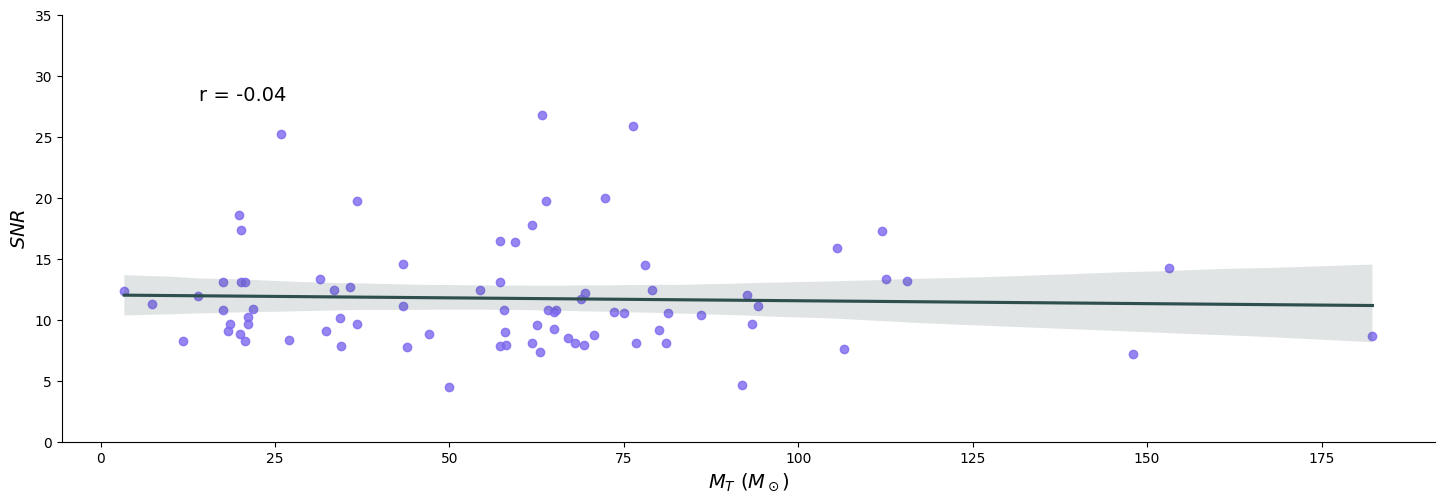

In [ ]:
#another graph for the total mass to the SNR
#There is no correlation (r = -0.04, p > 0.5) between SNR and the total black hole mass.
xx = cleanedCSVFILE['total_mass_source'].to_list()
yy = cleanedCSVFILE['network_matched_filter_snr'].to_list()
corr, pp = scipy.stats.pearsonr(xx, yy)
sb.lmplot(y="network_matched_filter_snr", x="total_mass_source", data=cleanedCSVFILE, aspect = 2.9, scatter_kws={'color': 'mediumslateblue'}, line_kws={'color': 'darkslategrey'});
plt.xlabel(r"$M_{T}\ (M_\odot$)", color = 'black', fontsize='14', horizontalalignment='center')
plt.ylabel('$SNR$', fontsize='14')
plt.ylim(0, 35)
plt.text(0.1, 0.8, f'r = {corr:.2f}', fontsize=14, transform=plt.gca().transAxes)
pp

4.2013113609905185e-12

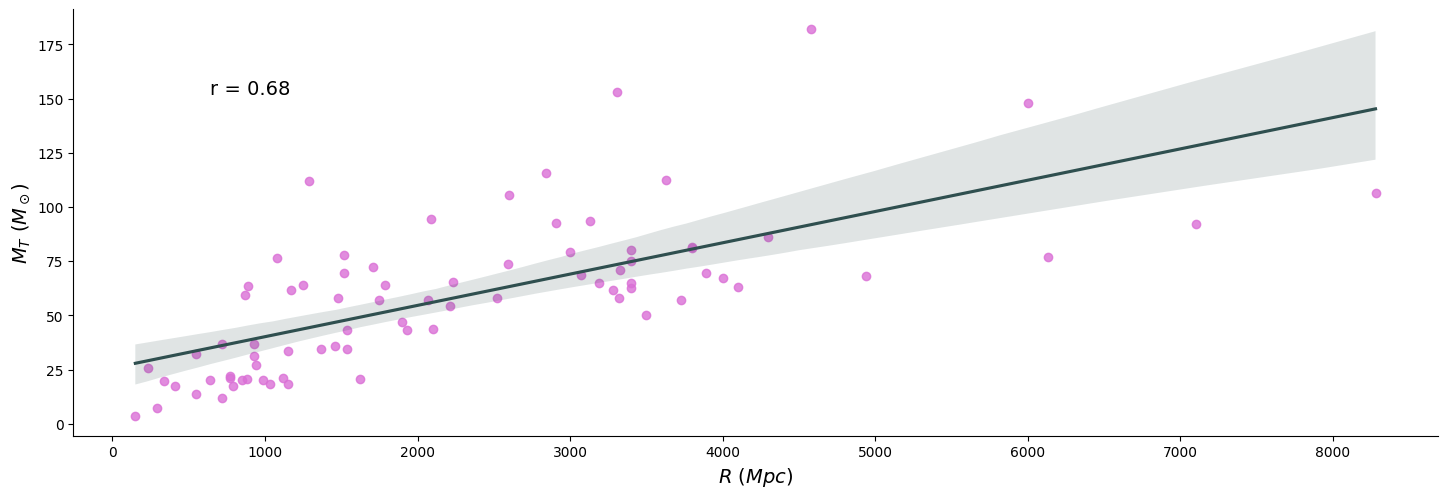

In [ ]:
#this is the graph for the distance to the total mass
#Strong correlation (r = 0.68, p < 0.0001) is observed between total mass and distance.
xx = cleanedCSVFILE['luminosity_distance'].to_list()
yy = cleanedCSVFILE['total_mass_source'].to_list()
corr, pp = scipy.stats.pearsonr(xx, yy)
sb.lmplot(y="total_mass_source", x="luminosity_distance", data=cleanedCSVFILE, aspect = 2.9, scatter_kws={'color': 'orchid'}, line_kws={'color': 'darkslategrey'});
plt.ylabel(r"$M_{T}\ (M_\odot$)", color = 'black', fontsize='14', horizontalalignment='center')
plt.xlabel(r"$R\ (Mpc$)", color = 'black', fontsize='14', horizontalalignment='center')
#plt.ylim(0, 35)
plt.text(0.1, 0.8, f'r = {corr:.2f}', fontsize=14, transform=plt.gca().transAxes)
pp

Text(13.819444444444445, 0.5, 'Count')

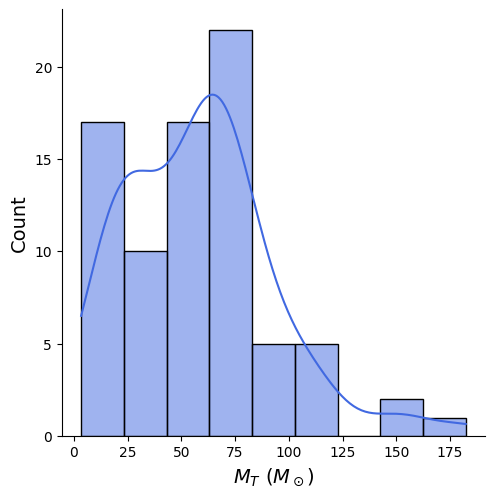

In [ ]:
#this is the distribution of the total mass
sb.displot(data=cleanedCSVFILE, x="total_mass_source", fill="True", color = "royalblue", kde=True)
plt.xlabel(r"$M_{T}\ (M_\odot$)", color = 'black', fontsize='14', horizontalalignment='center')
plt.ylabel('Count', fontsize='14')

Text(13.819444444444445, 0.5, 'Count')

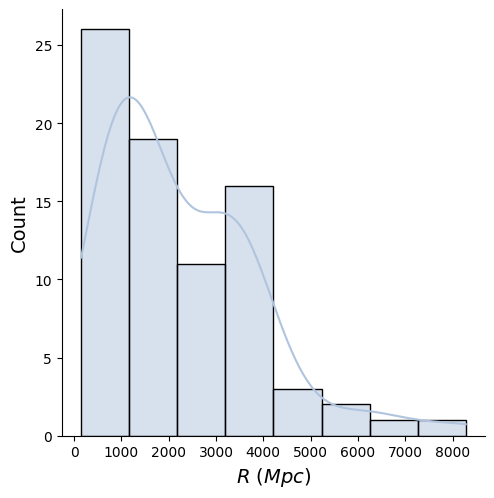

In [ ]:
#this is distribution of the distance away from Earth
sb.displot(data=cleanedCSVFILE, x="luminosity_distance", fill="True", color = "lightsteelblue", kde=True)
plt.xlabel(r"$R\ (Mpc$)", color = 'black', fontsize='14', horizontalalignment='center')
plt.ylabel('Count', fontsize='14')

Text(0.6944444444444446, 0.5, 'Count')

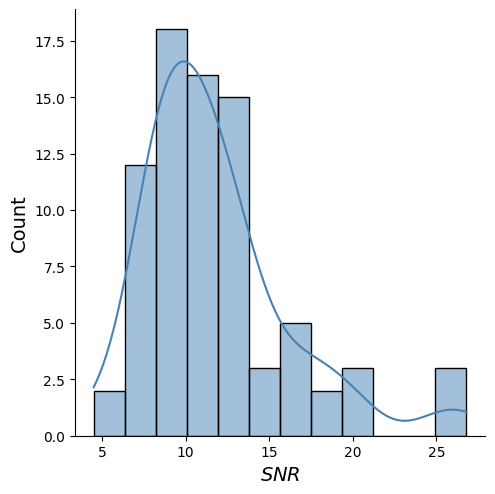

In [ ]:
#This is the distribution of the SNR
sb.displot(data=cleanedCSVFILE, x="network_matched_filter_snr", fill="True", color = "steelblue", kde=True)
plt.xlabel('$SNR$', fontsize='14')
plt.ylabel('Count', fontsize='14')